In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

In [2]:
learning_rate=[0.05,0.005,0.0005]
training_epochs=[100,500,1000]
display_step = 50

In [28]:
train_X=np.asarray([1,2,4,3,5])
train_Y=np.asarray([1,3,3,2,5])
n_samples = train_X.shape[0]

In [29]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

In [33]:
def processData(learning_rate,training_epochs):
    print("LEARNING RATE=",learning_rate,"\t Epoch=",training_epochs,"\n\n")
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)

    # Fit all training data
        for epoch in range(training_epochs):
            for (x, y) in zip(train_X, train_Y):
                sess.run(optimizer, feed_dict={X: x, Y: y})
                
        #Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "%s"%(c), "W=", sess.run(W), "b=", sess.run(b))

        print ("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

LEARNING RATE= 0.05 	 Epoch= 100 


Epoch: 0050 cost= [ 8.96753025] W= 1.48215 b= 0.668724
Epoch: 0100 cost= [ 8.9677248] W= 1.48215 b= 0.668766
Optimization Finished!
Training cost= [ 8.9677248] W= 1.48215 b= 0.668766 



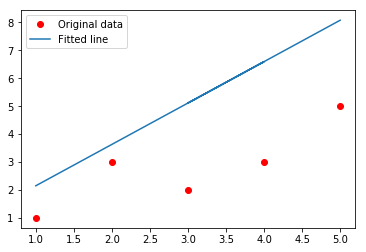

LEARNING RATE= 0.005 	 Epoch= 500 


Epoch: 0050 cost= [ 0.99609315] W= 0.702903 b= 0.635031
Epoch: 0100 cost= [ 0.94557416] W= 0.647106 b= 0.867344
Epoch: 0150 cost= [ 0.92935812] W= 0.616453 b= 0.994965
Epoch: 0200 cost= [ 0.92393166] W= 0.599615 b= 1.06507
Epoch: 0250 cost= [ 0.92200148] W= 0.590364 b= 1.10359
Epoch: 0300 cost= [ 0.92125809] W= 0.585282 b= 1.12475
Epoch: 0350 cost= [ 0.92094541] W= 0.582491 b= 1.13637
Epoch: 0400 cost= [ 0.92080253] W= 0.580957 b= 1.14276
Epoch: 0450 cost= [ 0.92073286] W= 0.580114 b= 1.14626
Epoch: 0500 cost= [ 0.92069709] W= 0.579651 b= 1.14819
Optimization Finished!
Training cost= [ 0.92069709] W= 0.579651 b= 1.14819 



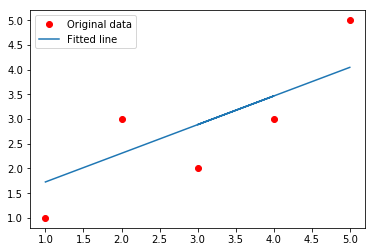

LEARNING RATE= 0.0005 	 Epoch= 1000 


Epoch: 0050 cost= [ 1.14084816] W= 0.743481 b= 0.25066
Epoch: 0100 cost= [ 1.1041019] W= 0.760128 b= 0.311944
Epoch: 0150 cost= [ 1.08233202] W= 0.748531 b= 0.362743
Epoch: 0200 cost= [ 1.0629487] W= 0.736508 b= 0.410359
Epoch: 0250 cost= [ 1.04570985] W= 0.725129 b= 0.455243
Epoch: 0300 cost= [ 1.0303793] W= 0.714399 b= 0.49756
Epoch: 0350 cost= [ 1.01674604] W= 0.704282 b= 0.537457
Epoch: 0400 cost= [ 1.00462139] W= 0.694743 b= 0.575075
Epoch: 0450 cost= [ 0.99383807] W= 0.68575 b= 0.610542
Epoch: 0500 cost= [ 0.98424768] W= 0.677271 b= 0.643981
Epoch: 0550 cost= [ 0.97571808] W= 0.669276 b= 0.675509
Epoch: 0600 cost= [ 0.96813172] W= 0.661739 b= 0.705234
Epoch: 0650 cost= [ 0.9613837] W= 0.654632 b= 0.73326
Epoch: 0700 cost= [ 0.95538116] W= 0.647932 b= 0.759685
Epoch: 0750 cost= [ 0.95004195] W= 0.641615 b= 0.784598
Epoch: 0800 cost= [ 0.94529235] W= 0.635659 b= 0.808087
Epoch: 0850 cost= [ 0.94106704] W= 0.630043 b= 0.830233
Epoch: 0900 cost=

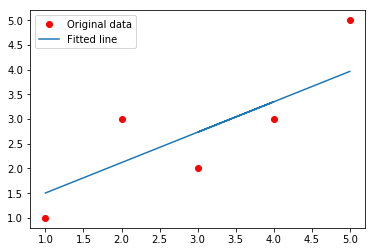

In [34]:
#model_output = tf.add(tf.matmul(x_data, A[W]), b)

pred = tf.add(tf.multiply(X, W), b)
ridge_param = tf.constant(1.)
ridge_loss = tf.reduce_mean(tf.square(W))
cost = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(pred - Y)), tf.multiply(ridge_param,ridge_loss)), 0)
    
#cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
for (x,y) in zip(learning_rate,training_epochs):
    processData(x,y)